In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control

# Root Locus

Typical design scenario:
- System with multiple known parameters, and one unknown or varying parameter (K)
- The unknown parameter makes it impossible to know if system is stable or if meets our design criteria

For example:

$$
G(s) = \frac{s^2 +s + 1}{s^3 + 4s^2 + Ks+1}
$$

- Changing $K$ changes the locations of the poles
- Poles are in fact values of $s$ s.t.: $s^3 + 4s^2 + Ks+1=0$

As control engineers we have two questions at this point:
- How to design a system that meets the requirements:
   - What value of $K$ should I choose to meet the requirements (i.e., that places the poles at the correct location in the $s$ plane)
- What is the effect of variations on a control system that has been already designed:
   - How sensitive is the system to a value of $K$ that is slightly different than what we have estimated (or predicted).

One way: pick a random value of $K$ and plot the poles in the $s$ plane.

For example, if $K=0$:

In [ ]:
K=0
poles = np.roots([1, 4, K, 1])
print('Poles for K={}: {}'.format(K, poles))

Poles for K=0: [-4.06064703+0.j         0.03032351+0.4953248j  0.03032351-0.4953248j]


Text(0, 0.5, 'Imag')

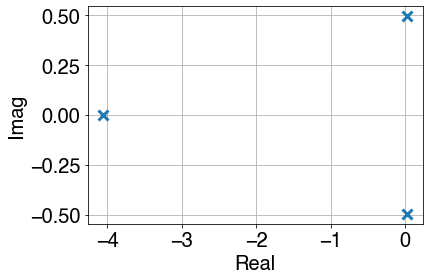

In [ ]:
plt.plot(np.real(poles), np.imag(poles), marker='x', markersize=10, linestyle='', linewidth=3, markeredgewidth=3)
plt.grid()
plt.xlabel('Real');
plt.ylabel('Imag');

We can do it for multiple values of K, calcolating the root of $s^3 + 4s^2 + Ks+1=0$, for $K \rightarrow \infty$ (or until we get to a high enough value of $K$).

In [ ]:
poles = []
K_range = np.arange(0, 10, 0.5)
for K in K_range:
    poles.append(np.roots([1, 4, K, 1]))
    # print('Poles for K={}: {}'.format(K, poles[-1]))

And plot it:

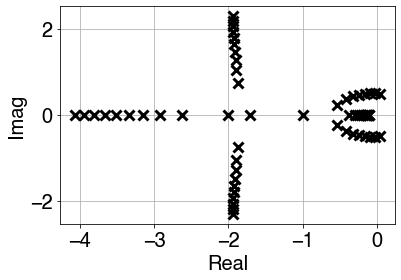

In [ ]:
plt.plot(np.real(poles), np.imag(poles), marker='x', markersize=10, linestyle='', color='k', markeredgewidth=3)
plt.grid()
plt.xlabel('Real')
plt.ylabel('Imag');

Connecting all these points together is a drawing of how all these poles move through the $s$-plane as we vary $K$.
This is what the Root Locus method does.

### Interpreting the location of the poles in the s-plane

- The axis of the $s$-plane are: Real component ($\sigma$) along the x-axis, and Imag component ($\omega$) on the y-axis.
- Each location of the $s$-plane corresponds to a specific waveform in the time domain through equation: $e^{st}$
- If $s$ is real: this corresponds to exponential growth ($s$>0) or decay ($s$<0). 
   - The further we are in the left half plane the faster the waveform decays
   - The further we are in the right half plane the faster the waveform grows
- If $s$ is complex: this corresponds to a pure oscillatory motion (sinusoidal) in the time domain.
   - Always in pair (complex conjugate of each other). This is due to having to deal with real time. 
   - The further the are along the $\omega$ axis, the faster the oscillation
- If $s$ is a combination of real and imaginary values mix both exponential and sinusoidal motion.
   
See also notebook `05_System_response`.

When we anlayse a system:
- Both poles and zeros are needed to characterise the forced response to an input
- Only the poles are needed to dictate the unforced response of the system to a set of initial conditions
- This links directly to the stability of the system

Knowing the location of the poles in the $s$-plane:
- Determines the stability, 
- Determines if the response is oscillatory (and at what frequency), or exponential (and at what rate)
- And more: for example makes it possible to determine the damping ratio $\zeta=cos(\theta)$: two poles on the same $\theta$ line would have the same damping ratio



<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/root-locus-poles.png" alt="root_locus_poles.png" style="width: 550px;"/> </td>
</tr>
</table>

### A note on the damping ratio

- Normalised unitless value ($\zeta$)
- $\zeta=0$: no dumping. The pole is on the imaginary axis
- $\zeta=1$: perfectly dumped. The pole is exponential and hence on the real axis.
- $\zeta \in (0, 1)$: damped oscillations (the poles are somewhere in the s-plane).
- $\zeta>1$: over dumped (still on the real axis).


<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/root-locus-lines-of-constant-damping-1.png" alt="root-locus-damping-ratio.png" style="width: 350px;"/> </td>
</tr>
</table>



## Damping ratio, natural frequency and pole location

Let's consider a second order system:

$$
\frac{\omega_n^2}{s^2+2\zeta\omega_n s+ \omega_n^2}
$$

The characteristic equation is:

$$
s^2+2\zeta\omega_n s+ \omega_n^2 = 0
$$

and when we solve it:

$$
s_{1,2} = \frac{-2\zeta\omega_n \pm \sqrt{4\zeta^2\omega_n^2-4\omega_n^2}}{2} = -\zeta\omega_n \pm \omega_n\sqrt{(\zeta^2-1)}
$$

- if we assume $\zeta < 1$, we have complex roots

$$
s_{1,2} = -\zeta\omega_n \pm \omega_n\sqrt{(1-\zeta^2)}j
$$

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/root-locus-damping-ratio-mit-cropped.png" alt="root-locus-damping-ratio-mit.png" style="width: 500px;"/> </td>
    <td> <img src="img/root-locus-damping-ratio-mit-cropped-scaling.png" alt="root-locus-damping-ratio-mit.png" style="width: 500px;"/> </td>
</tr>
</table>

- If we hold $\zeta$ constant, the poles scale with $\omega_n$

- What is the angle $\theta$ (sometime I will also call it $\phi$)?

$$
\sqrt{\zeta^2\omega_n^2 + \omega_n^2(1-\zeta^2)} cos(\theta) = \omega_n \zeta
$$

$$ \Downarrow $$

$$
cos(\theta) = \frac{\omega_n \zeta}{\sqrt{\zeta^2\omega_n^2 + \omega_n^2(1-\zeta^2)} }
$$

$$ \Downarrow $$

$$
cos(\theta) = \frac{\omega_n \zeta}{\sqrt{\omega_n^2(\zeta^2 +1 -\zeta^2)} } = \frac{\omega_n \zeta}{\omega_n} = \zeta
$$

- Remember that we assumed $\zeta < 1 $
- When $\zeta > 1$, the two roots separate along the real axis: we have two first order real poles.

Why are we interested in this?

- Requirements most of the time come in the form of:
   - Damping ration (e.g. greater than some value)
   - Natural frequency
   - Time to half, time to rise, etc.
   - Or any combination of these

And these requirements translate into constraints on the position of the poles.

<table style='margin: 0 auto' rules=none>
<tr>
    <td> <img src="img/root_locus-3.png" alt="root-locus-constraints" style="height: 250px;"/> </td>
    <td> <img src="img/root_locus-2.png" alt="root-locus-constraints" style="height: 250px;"/> </td>
    <td> <img src="img/root_locus-1.png" alt="root-locus-constraints" style="height: 250px;"/> </td>
</tr>
</table>

## A simple design problem

Suppose you need to design a spring-dumper-mass system:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/root-locus-schematic_diagram.png" alt="root-locus-schematic_diagram.png" style="width: 450px;"/> </td>
</tr>
</table>



- You are given the spring ($k=1$) and the mass ($m=1$) 
- You can choose the damper that is needed to achieve the requirements
   - System shall have $\xi \ge 0.75$.

The transfer function of the system is:

$$
\frac{Z(s)}{F(s)} = \frac{1}{s^2+bs+1}
$$

The root locus method gives a method to verify how the poles move as we change the value of the parameter $b$ from 0 to infinity.

Let's use the Python again to see what the Root Locus looks like in this case:

Desired poles (magenta): [-0.75+0.66143783j -0.75-0.66143783j]


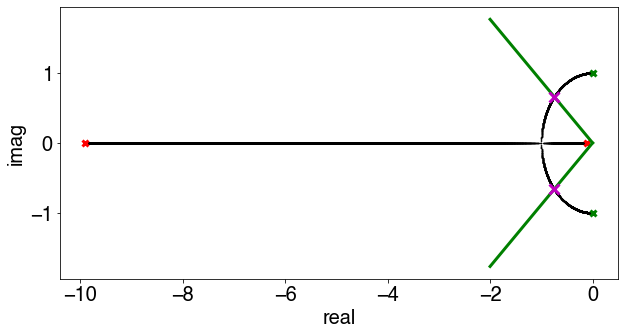

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(10,5))

poles = []
b_range = np.arange(0, 10, 0.001)
for b in b_range:
    poles.append(np.roots([1, b, 1]))
    
plt.plot(np.real(poles), np.imag(poles), marker='.', markersize=1, linestyle='', color='k', markeredgewidth=1)
plt.plot(np.real(poles[0]), np.imag(poles[0]), marker='x', color='g', markeredgewidth=3, linestyle='')
plt.plot(np.real(poles[-1]), np.imag(poles[-1]), marker='x', color='r', markeredgewidth=3, linestyle='')

# desired damping lines
phi = np.arccos(0.75)
xi = 0.75
tan_theta = np.sqrt(1-xi**2)/xi

x_range = np.linspace(-2, 0)
plt.plot(x_range, -tan_theta*x_range, linewidth=3, color='g')
plt.plot(x_range, tan_theta*x_range, linewidth=3, color='g')

# Choose b = 1.5
b = 1.5
poles_desired = np.roots([1, b, 1])
print('Desired poles (magenta):', poles_desired)
plt.plot(np.real(poles_desired), np.imag(poles_desired), 
         marker='x', markersize=10, linestyle='', color='m', markeredgewidth=3)

plt.xlabel('real');
plt.ylabel('imag');

- We start from the imaginary axis ($b=0$), as we would expect if we had no dumping: we expect oscillations
- As we increase the damping the poles move in the left half plane and towards the real axis, until for the critical dumaping value they hit the real axis, where they split and separate on the real line
- We can now plot the desired damping lines ($\xi\ge0.75$)

For example, if we choose $b=1.5$, we have poles: [-0.75+0.66143783j -0.75-0.66143783j], which meet our requirements.

However...what happens if one of the parameters changes? For example, the spring might be sensitive to temperature variation:
- Hot: 0.9 K_nominal
- Cold: 1.1 K_nominal

And we can again use the Root Locus method, but this time using:

$$
\frac{Z(s)}{F(s)} = \frac{1}{s^2+1.5s+k}
$$

for $K \in [0.9k, 1.1k]$


[-0.75+0.66143783j -0.75-0.66143783j]


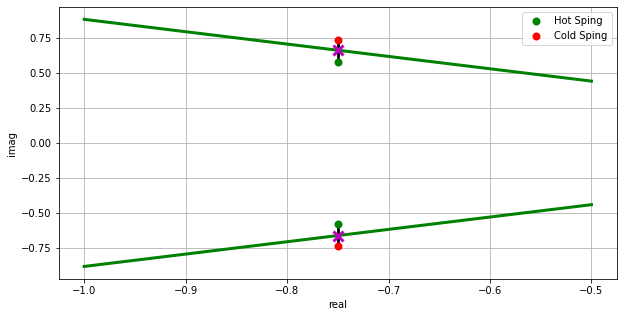

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(10,5))

poles = []
k_range = np.arange(0.9, 1.1, 0.001)
for k in k_range:
    poles.append(np.roots([1, 1.5, k]))
    
plt.plot(np.real(poles), np.imag(poles), marker='.', markersize=1, linestyle='', color='k', markeredgewidth=1)
plt.plot(np.real(poles[0]), np.imag(poles[0]), marker='.', color='g', markeredgewidth=5, linestyle='', label='Hot Spring')
plt.plot(np.real(poles[-1]), np.imag(poles[-1]), marker='.', color='r', markeredgewidth=5, linestyle='', label='Cold Spring')
plt.legend()
# desired damping lines
phi = np.arccos(0.75)
xi = 0.75
tan_theta = np.sqrt(1-xi**2)/xi

x_range = np.linspace(-1, -0.5)
plt.plot(x_range, -tan_theta*x_range, linewidth=3, color='g')
plt.plot(x_range, tan_theta*x_range, linewidth=3, color='g')

# Choose b = 1.5
b = 1.5
poles_desired = np.roots([1, b, 1])
print(poles_desired)
plt.plot(np.real(poles_desired), np.imag(poles_desired), 
         marker='x', markersize=10, linestyle='', color='m', markeredgewidth=3)

plt.grid()
plt.xlabel('real')
plt.ylabel('imag');

- When the spring is cold we do not meet our requirements!
- We might need to find a way to restrict the temperature variation, redesign our system or have a warning that performance might degrade depending on temperature. Depends on the application.

# Sketching the Rool Locus

- As control engineers, you might not use an exact sketch in practise (Matlab or the Python Control Library will help you!), but most often than not, you will use an approximate one!

- With practice you will be able to look at the open loop zeros and poles of the system and visualise how the closed loop RL looks like.

- Practise makes perfect!

Let's take an example:

$$
G(s) = \frac{1}{(s+1)(s-2)}
$$

The system is clearly unstable and we need to design a controller to make the closed loop system stable.

One option might be that of using a proportional controller:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/root-locus-system.png" alt="root-locus-system.png" style="width: 650px;"/> </td>
</tr>
</table>

- If we plot how the poles change when $K$ changes however, we realise that one root is alwyas in the right half plane.
- Moreover, the root that starts at -1 also goes unstable.

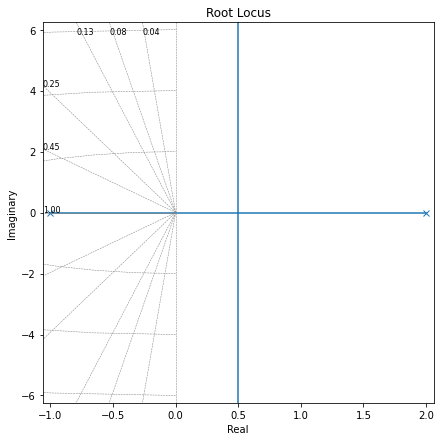

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))
[rlist, klist] = control.root_locus(control.tf([1],[1, -1, -2]))

- This problem cannot be solved with a proportional controller only

Design question:
- How do we place poles and zeros in the feedback path so that all poles are in the left half plane?


- Understanding how to place the poles/zeros come from experience drawing the Root Locus

## Classic Set up of the Root Locus Problem:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/root-locus-problem.png" alt="root-locus-problem.png" style="width: 650px;"/> </td>
</tr>
</table>

- Gain in the forward path
- Unity feedback

The closed transfer function is:

$$
G_{cc} = \frac{KG(s)}{1+KG(s)}
$$

- Given that we are interested in finding the poles of the closed loop system we only need: $1+KG(s)=0$

- This is the form of the characteristic equation that we need in order to apply the rules that we are going to discuss.

- **Note:** Matlab might draw the root locus starting from a slightly different form, and considers the gain in the feedback path. Note that the denominator does not change (the closed loop system will behave differently to forced inputs but this is not important for our objectives when we plot the root locus). To have the Matlab representation the same, we need to multiply the input by $K$.
- From a stability perspective there is no difference


<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/root-locus-matlab-equivalent.png" alt="root-locus-matlab-equivalent.png" style="width: 650px;"/> </td>
</tr>
</table>

- **Note:** Before we analysed

$$
G(s) = \frac{s^2 +s + 1}{s^3 + 4s^2 + Ks+1}
$$

which is not in the form that we would like.

- We can translate it back to the form we need.
- We are looking for the roots of the characteristic equation and how they mode as we change $K$.

Steps:
- Write the characteristic equation: $s^3 + 4s^2 + Ks+1=0$
- Group all $K$ terms: $s^3 + 4s^2 +1 + (Ks) =0$
- Divide by the non-$K$ terms to obtain the form we need:

$$
s^3 + 4s^2 +1 + (Ks) = 0 \Rightarrow \frac{s^3 + 4s^2 +1}{s^3 + 4s^2 +1} + K\frac{s}{s^3 + 4s^2 +1} = 1 + K\frac{s}{s^3 + 4s^2 +1}
$$

- Note that we are now considering a new $G(s)=\frac{s}{s^3 + 4s^2 +1}$
- We can use the Root Locus to analyse how any change in one of the parameters affect the results, not only the gain in the forward path. *It is really powerful!*.

### How to sketch the Root Locus: Drawing Rules

- We use 10 drawing rules

Start from:
$$
1+KG(s)=0 \Rightarrow 1+K\frac{Q(s)}{P(s)} = 0
$$

- We have re-written $G(s)$ as a ratio of two polynomials
- Always start from this form.


### RULE 1 

> There are $n$ lines (loci) in the Root Locus, where $n$ the maximum between the degree of the denominator and of the numerator.
   - We have as many lines as the number of poles or zeros (whichever is greater)  
   
   - e.g. 3 poles and 2 zeros: 3 lines

### RULE 2
> As $K$ increases from 0 to $\infty$, the roots move the poles of $G(s)$ to the zeros of $G(s)$.

Let's unpick this rule a bit and start from:
$$
1+K\frac{Q(s)}{P(s)} = 0 \Rightarrow P(s)+KQ(s)=0
$$

- Poles are when $P(s)=0$
- Zeros are when $Q(s)=0$

When $K=0$, the $P(s)+KQ(s)=0$ we are left with $P(s)=0$. So the poles of the closed loop system start at the poles of $G(s)$.

When $K\rightarrow\infty$, we put more importance to $Q(s)$, which dominates our characteristic equation: the root locus ends at the zeros of $G(s)$.

- Rule 2 says: As $K$ increases, the closed loop poles move from the open loop poles to the open loop zeros.
- What happens when we have a different number of poles and zeros?   

- **case 1**: If $\text{order}(Q(s))=\text{order}(P(s))$: each have a pair, and the roots travel from one pole to a zero

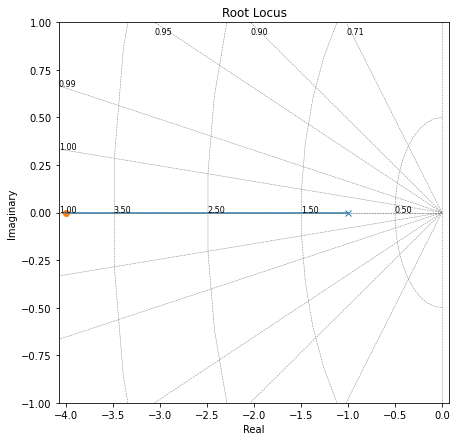

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))
[rlist, klist] = control.root_locus(control.tf([1, 4],[1, 1]))

   - **case 2:** If $\text{order}(P(s))>\text{order}(Q(s))$, the lines from the extra poles would go to infinity.

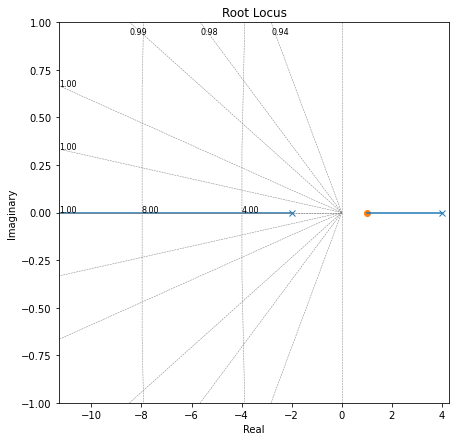

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))
[rlist, klist] = control.root_locus(control.tf([1, -1],[1, -2, -8]))

- **case 3:** If $\text{order}(Q(s))>\text{order}(P(s))$, the extra lines come from infinity.

For example:
$$
G(s) = \frac{s^2-s}{s-3}
$$

In [ ]:
#[rlist, klist] = control.root_locus(control.tf([1, -1, 0], [1, -3]))  
# For some reason python control lib does not plot it..
# The figure below is done with Matlab:
# >> rlocus(tf([1, -1, 0], [1, -3]))

<!--table style='margin: 0 auto' rules=none-->
<tr>
<td> <img src="img/root-locus-image-3.png" alt="root-locus-image-3.png" style="width: 500px;"/> </td>
</tr>
<!--/table-->

### RULE 3

> When roots are complex they occur in conjugate pairs (we saw this already multiple times! - it is due to having real systems) and they move in pairs.
 - The Root Locus is symmetric around the real line

### RULE 4
> At no time will the same root cross over its path (no loop): no value of $s$ will correspond to more than one value of $K$.
    
- Note that paths of two different roots are allowed to intersect.

For example if we have poles in $s=0$ and $s=1$:

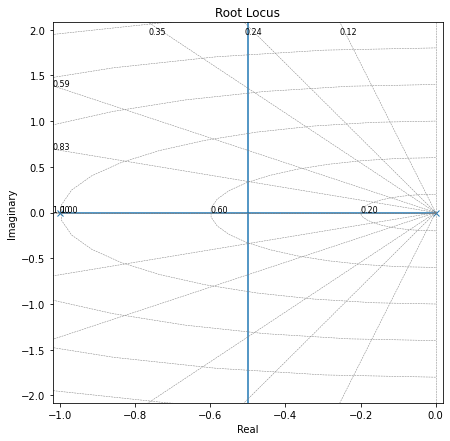

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))
[rlist, klist] = control.root_locus(control.tf([1], [1, 1, 0])) 

### Using the first 4 rules - example:

$$
G(s) = \frac{s}{(s-3)(s+2-2j)(s+2+2j)}
$$

- We have 3 poles, so we have 3 lines
- 3 poles, and 1 zeros: 2 lines go to infinity
- The two complex conjugate roots move in pairs (mirrored about the real axis).
- Each root will not have a path that creates loop

Let's now plot the Root Locus with the Python Control Library

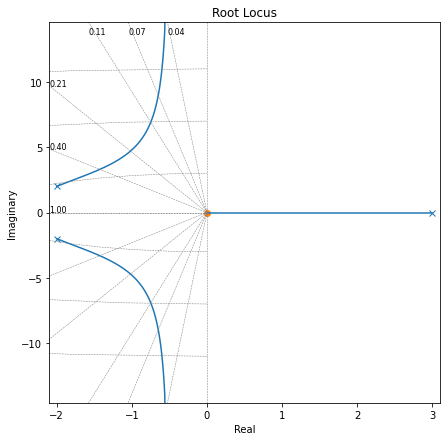

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))
[rlist, klist] = control.root_locus(control.tf([1, 0],[1, 1, -4, -24]))

We can check our roots:

In [ ]:
np.roots([1, 1, -4, -24])

array([-2.+2.j, -2.-2.j,  3.+0.j])

### RULE 5
> The portion of the real axis to the left of an odd number of open loop poles and zeros (critical frequencies) are part of the loci.

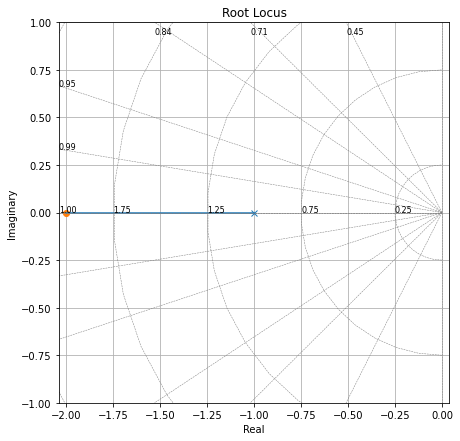

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))
[rlist, klist] = control.root_locus(control.tf([1, +2],[1, 1]))
plt.grid()

Note that if we swap the location of the pole and zero, the root locus is still between them, but its direction is reversed: it is always from the open loop pole to the open loop zero.

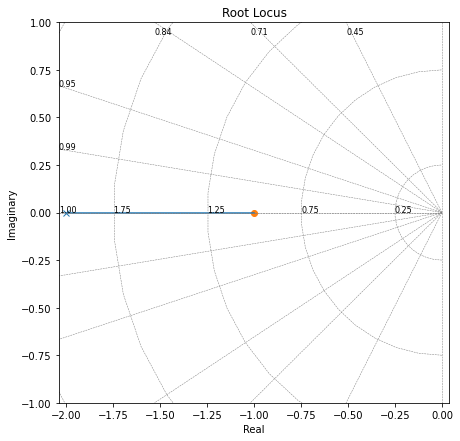

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))
[rlist, klist] = control.root_locus(control.tf([1, 1],[1, 2]))

If we have three poles:

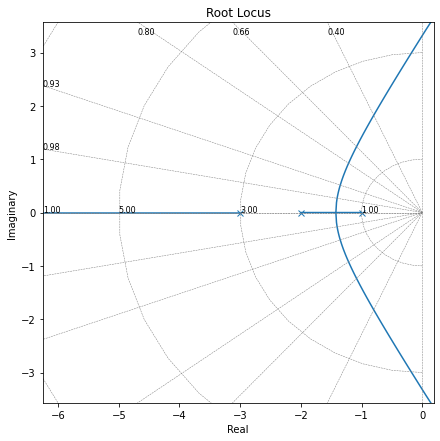

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))
[rlist, klist] = control.root_locus(control.tf([1],[1, 6, 11, 6]))

Note that:
- To the left of the third pole, the root locus goes to infinity
- Between the first and the second critical frequencies the lines come together and then they go off the real axis. We will see in a minute where they go.

### RULE 6
>Lines leave (or break out) and enter (break in) the real line at $90^o$ (in search of an open loop zero)

### RULE 7
> If there are not enough poles or zeros to make a pair then the extra lines go to or come from infinity

For example:

- One pole, no zero: **1 extra pole**: the left side of the pole is part of the locus and it goes to infinity

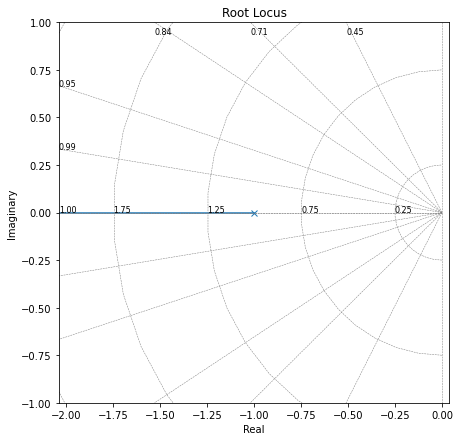

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))
[rlist, klist] = control.root_locus(control.tf([1],[1, 1]))

- Two poles and no zeros, **2 extra poles**: the left side of an odd number of poles in part of the locus and they leave the real axis at 90 deg towards infinity

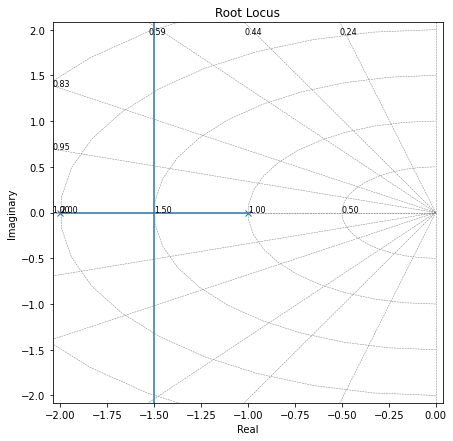

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))
[rlist, klist] = control.root_locus(control.tf([1],[1, 3, 2]))

- Two poles and one zero, **1 extra pole**

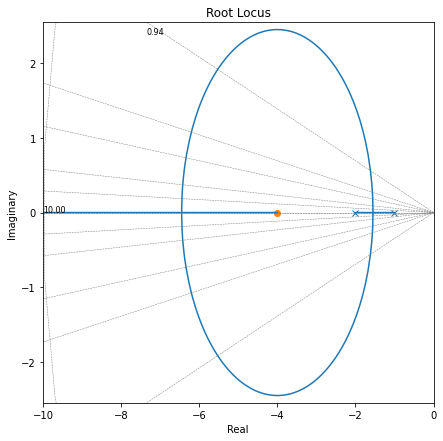

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))
[rlist, klist] = control.root_locus(control.tf([1, 4],[1, 3, 2]))
plt.xlim((-10, 0));

- What happens when we have two extra zeros?
- Two lines would be coming in _from_ infinity

Given that we have lines going to (or coming from) infinity, at what angles do they do that?

### RULE 8
> Lines go to infinity along asymptotes

- We have as many asymptotes as many unmatched pole-zero pairs ($n-m$)
- The angles of the asymptotes is (in deg):

$$
\Phi_A = \frac{2q+1}{n-m} \cdot 180
$$

Where $n-m$ is the number of unmatched pairs (#poles-#zeros), and $q=0, 1, 2, ..., (n-m-1)$

- The centroid of the asymptotes is:

$$
C = \frac{\sum{\text{Finite poles}} - \sum{\text{Finite zeros}}}{n-m}
$$

- This is the point on the real axis where all asymptotes come together.

For example:

- $n-m=1$  (1 line that goes to infinity)

$$
\Phi_A = \frac{2\cdot 0 + 1}{1} \cdot 180 = 180
$$

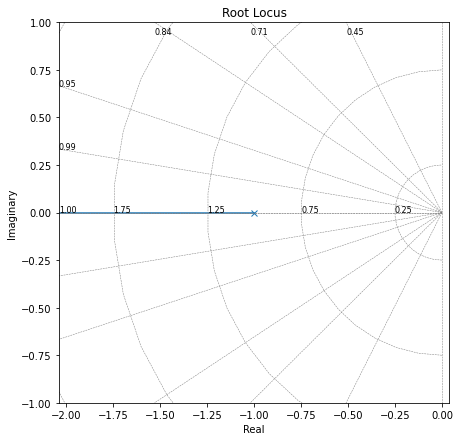

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))
[rlist, klist] = control.root_locus(control.tf([1],[1, 1]))

For example:

- $n-m=2$  (2 lines that go to infinity)

$$
\Phi_{A_0} = \frac{2\cdot 0 + 1}{2} \cdot 180 = 90
$$

$$
\Phi_{A_1} = \frac{2\cdot 1 + 1}{2} \cdot 180 = 270 = -90
$$

with centroid (this determines exactly where they go off to $\pm$ 90 deg):

$$
C = \frac{\sum{\text{Finite poles}} - \sum{\text{Finite zeros}}}{n-m} = \frac{(-2-1)-0}{2} = -1.5
$$

- half way between the poles in this case where we only have two poles.

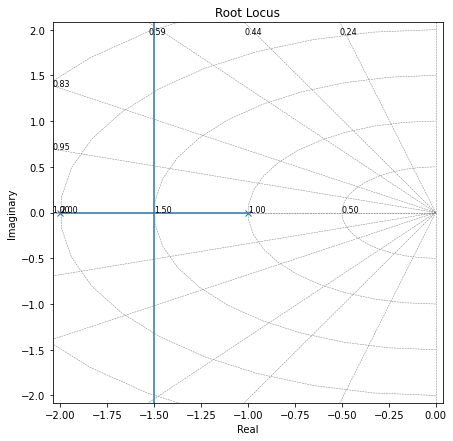

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))
[rlist, klist] = control.root_locus(control.tf([1],[1, 3, 2]))

------------------------

- What would you expect if we added one more pole and one more zero to the left of the -2 pole?

In [ ]:
#!cat answers/solution_root_locus_1

------------------------

- $n-m=3$ (3 lines that go to infinity)

$$
G(s) = \frac{1}{(s+1)(s+2)(s+3)}
$$

Centroid:

$$
\frac{-3 -2 -1}{3} = -2
$$

Angles:

$$
\Phi_{A_0} = 60
$$

$$
\Phi_{A_1} = 180
$$

$$
\Phi_{A_2} = -60
$$

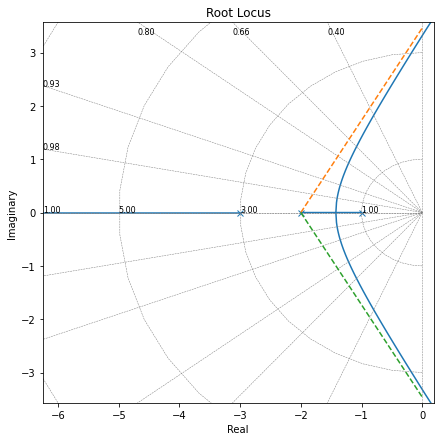

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))

[rlist, klist] = control.root_locus(control.tf([1],[1, 6, 11, 6]))

x_range = np.linspace(-2, 0);
plt.plot(x_range, np.tan(60/180*3.14)*x_range+np.tan(60/180*3.14)*(2), linestyle='--');
plt.plot(x_range, np.tan(-60/180*3.14)*x_range+np.tan(-60/180*3.14)*(2), linestyle='--');

### RULE 9
> If there is at least two lines to infinity, then the sum of all roots is constant

- This does not help sketching the roots but helps us with intuition

Suppose we have the system above:

$$
G(s) = \frac{1}{(s+1)(s+2)(s+3)}
$$

- The sum of the roots is $-6$. This is the sum of the roots when $K=0$ (the roots start at the open loop roots).
- When increase $K$ the roots starts too move, but their sum must still be $-6$

For example in the picture below, we can plot how the roots move for $K=0.29$

K= 0.28867513459481264


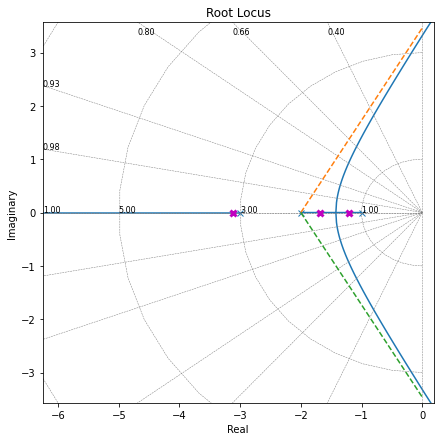

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))

[rlist, klist] = control.root_locus(control.tf([1],[1, 6, 11, 6]))

x_range = np.linspace(-2, 0)
plt.plot(x_range, np.tan(60/180*3.14)*x_range+np.tan(60/180*3.14)*(2), linestyle='--')
plt.plot(x_range, np.tan(-60/180*3.14)*x_range+np.tan(-60/180*3.14)*(2), linestyle='--')

k_id=3
print('K=', klist[k_id])
plt.plot(np.real(rlist[k_id]), np.imag(rlist[k_id]), marker='x', color='m', linestyle='', markeredgewidth=3)

- What is important is that given that the sum is constant, we are destabilising the complex pair half as fast as how we move the real root
- This is useful when trying to decide the gain of our system

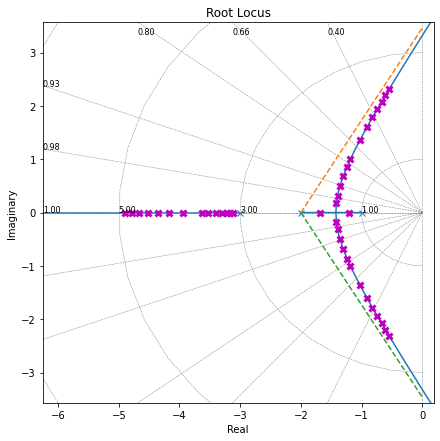

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))

[rlist, klist] = control.root_locus(control.tf([1],[1, 6, 11, 6]))

x_range = np.linspace(-2, 0)
plt.plot(x_range, np.tan(60/180*3.14)*x_range+np.tan(60/180*3.14)*(2), linestyle='--')
plt.plot(x_range, np.tan(-60/180*3.14)*x_range+np.tan(-60/180*3.14)*(2), linestyle='--')

for k_id in range(3, 30, 2):
    plt.plot(np.real(rlist[k_id]), np.imag(rlist[k_id]), marker='x', color='m', linestyle='', markeredgewidth=3)

- So far we have always considered $K \in [0, +\infty]$, let's see instead when we would like to analyse a negative gain.

### RULE 10 - Negative K
> The root locus when $K$ goes from 0 to $-\infty$ can be obtained reversing RULE 5 and adding $+180^o$ to the asymptote angles
   - For $K<0$, the root locus is on the right of the odd critical frequencies

### A few more comments

These set of rules only provide a sketch of the root locus.
For example we have not discussed where exactly is on the real axis the break in and break away points or the angle of departure for complex roots, or where the locus crosses the imaginary axis, or what is the gain associated to one specific point on the locus.

- Use references to go deeper in the topic (see `00_Syllabus`)
- Use software tool such as the Matlab SISO tool or the Python Control Library.

## A simple control problem


We have

$$
G(s) = \frac{1}{(s+1)(s-2)}
$$


And the root locus is:

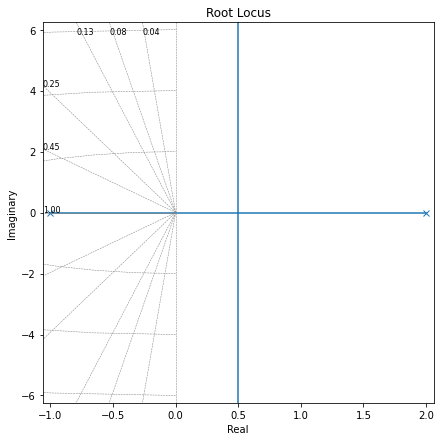

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))
[rlist, klist] = control.root_locus(control.tf([1],[1, -1, -2]))

- System is unstable and there is no $K$ that can stabilise it
- How can we make this stable?

-----------------------------------

- Given that we have two unmatched poles, they go off to inifinity with $\pm90$
- However, we know that if have only one unmatched pair, the unmatched root would go to +180
- This means that if we had one more zero to the left of our poles, we should obtain the desired behaviour.

For example, we could add a zero in $s=-2$.

Let's use `root_locus` to confirm:

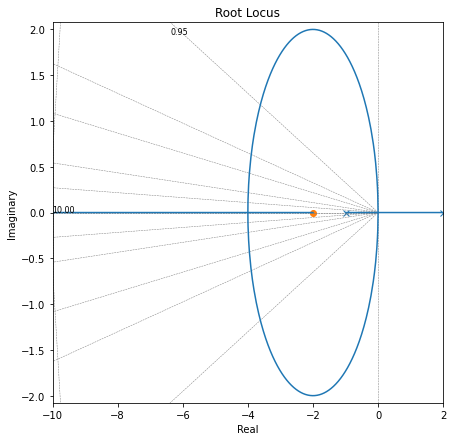

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))
[rlist, klist] = control.root_locus(control.tf([1, 2],[1, -1, -2]))
plt.xlim((-10, 2));

- Adding an open loop zero and choosing the correct gain has stabilised the system

To be more precide we have started from this:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/root-locus-problem.png" alt="root-locus-problem.png" style="width: 650px;"/> </td>
</tr>
</table>

and added a zero:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/root-locus-pd-controller.png" alt="root-locus-pd-controller.png" style="width: 650px;"/> </td>
</tr>
</table>

- The controller now has a proportional controller $(K)$ and a derivative controller $(s+2)$
- We have designed a PD controller in the $s$-domain

----------------------------------------------------------------------

### Example

$$
G(s)H(s) = \frac{1}{s(s+4)(s^2+4s+20)}
$$

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/root_locus_example_1.png" alt="root_locus_example_1" style="width: 650px;"/> </td>
</tr>
</table>


- Poles:

$s = 0, -4, -2\pm4j$

- 4 asymptotes:
   - angles: 45, 135, 225, 315 (deg)
   - centroid: -2 (everything is symmetric)

- How do the poles get to the asymptotes?

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/root_locus_example_2.png" alt="root_locus_example_1" style="width: 450px;"/> </td>
</tr>
</table>

Let's use what the root locus looks like:

In [ ]:
s = control.tf([1, 0], [1])

K = 1
GH = 1/(s*(s+4)*(s**2+4*s+20))

print(GH)


             1
---------------------------
s^4 + 8 s^3 + 36 s^2 + 80 s



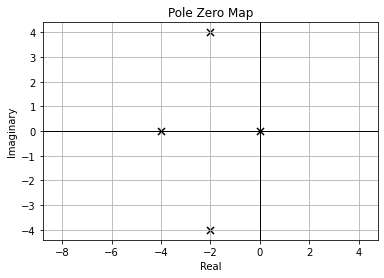

In [ ]:
%matplotlib inline
control.pzmap(GH)
plt.grid()

And for the closed loop system:

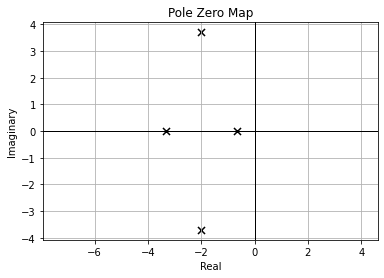

In [ ]:
# Change K from 1 to 105
control.pzmap(control.feedback(GH*40, 1));
plt.grid()

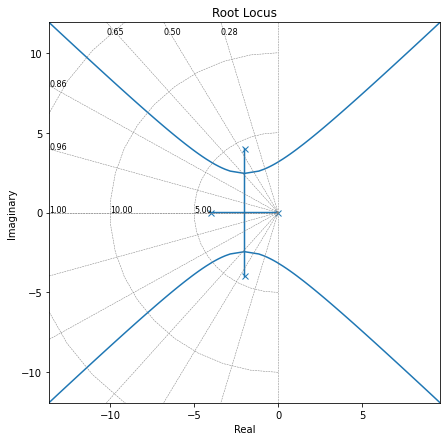

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(7, 7))
control.rlocus(GH);

- `control.rlocus` parameters:
  - `kvect` (list or ndarray, optional) – List of gains to use in computing diagram.
  - `print_gain` (bool) – If True (default), report mouse clicks when close to the root locus branches, calculate gain, damping and print.

<IPython.core.display.Javascript object>


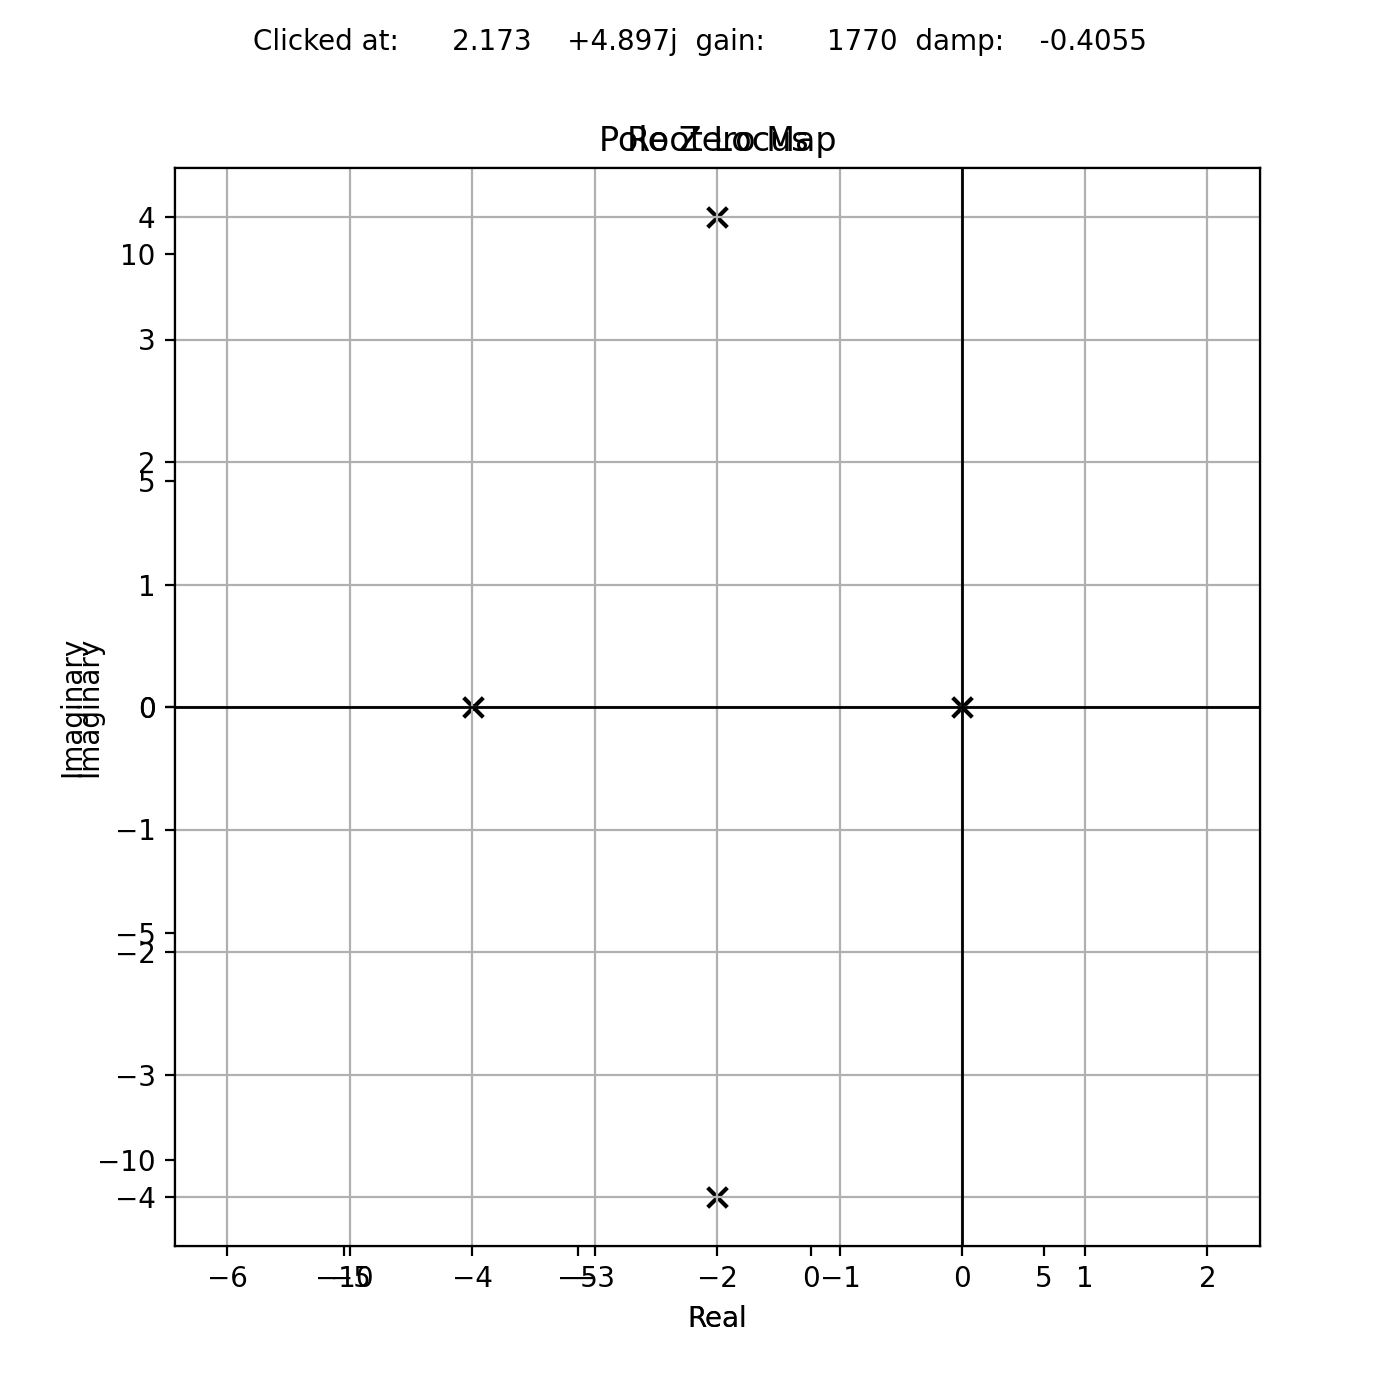

In [ ]:
%matplotlib notebook
fig, axs = plt.subplots(1,1,figsize=(7, 7))
control.rlocus(GH);

- The MATLAB sisotool has also additional tools that can help you in your controller design.

------------------

## Further comments

- Plotting the damping ratio line given a desired overshoot $S$ (e.g. $S=15\%$)

We know that:

$$
\xi = \frac{|\ln(S/100)|}{\sqrt{\pi^2 + \ln^2(S/100)}}
$$

and the angle $\beta = \cos^{-1}(\xi)$

Let's see this in action:

In [ ]:
# Percentage Overshoot
S = 15

# Equivalent damping ratio (from the equation)
xi = np.abs(np.log(S/100)/np.sqrt(np.pi**2+np.log(S/100)**2))

print('Damping ratio (xi): {:.4f}'.format(xi))

Damping ratio (xi): 0.5169


In [ ]:
# desired damping lines
phi = np.arccos(xi)
print('Angle phi: {:.4f} deg'.format(phi*180/np.pi))

Angle phi: 58.8734 deg


We can plot it:

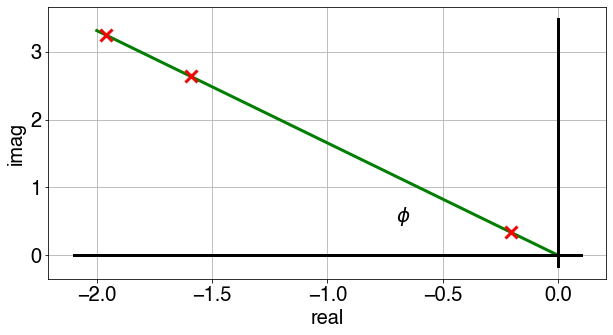

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(10,5))

x_range = np.linspace(-2, 0) # points on the constant damping ratio line

plt.plot(x_range, -np.tan(phi)*x_range, 
         linewidth=3, color='g')

plt.plot([x_range[1], x_range[10], x_range[-6]], 
          -np.tan(phi)* np.array([x_range[1], x_range[10], x_range[-6]]), 
         linewidth=3, linestyle='', color='r', marker='x', markeredgewidth=3, markersize=12)
plt.plot(plt.xlim(), [0, 0], linewidth=3, color='k')
plt.plot([0, 0], plt.ylim(), linewidth=3, color='k')
plt.text(-0.7, 0.5, "$\phi$", fontsize=20)
plt.grid()
plt.xlabel('real', fontsize=20)
plt.ylabel('imag', fontsize=20);

- All points along the line have the same damping ratio

Now we can go deeper in our analysis and define a second order transfer function.
- Note that to do this, we need to choose the natural frequency $\omega_n$.
- Natural frequency however does not influence overshoot, we are free to select any value. For example: $\omega_n=1$ rad/s.



In [ ]:
w = 1

Define the transfer function using the Python Control Library.

Let's use another way to do it, creating a transfer function object 's' first:

In [ ]:
s = control.tf([1, 0],[1])
print(s)


s
-
1



And now we can use the 's' object to define more complex transfer functions more easily:

In [ ]:
G = w**2/(s**2+2*xi*w*s+w**2)
print(G)


        1
-----------------
s^2 + 1.034 s + 1



And we can plot the step response:

In [ ]:
[tout, yout] = control.step_response(G)

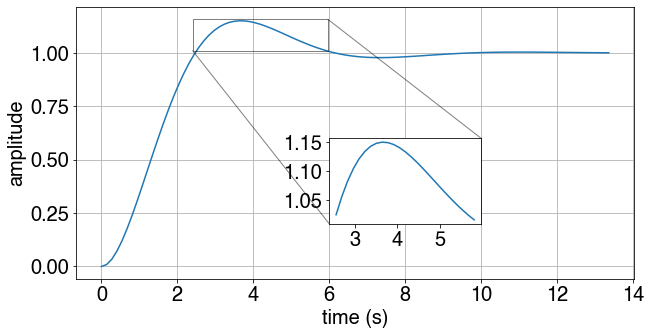

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(tout, yout)
axin1 = ax.inset_axes(
        [6, 0.2, 4, .4], transform=ax.transData)
axin1.plot(tout[yout>1.01], yout[yout>1.01])
ax.indicate_inset_zoom(axin1, edgecolor="black")
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.grid()

- As expected there is $15\%$ overshoot

Let's now verify that the natural frequency does not impact overshoot:

w 0.5
w 1.0
w 1.5
w 2.0


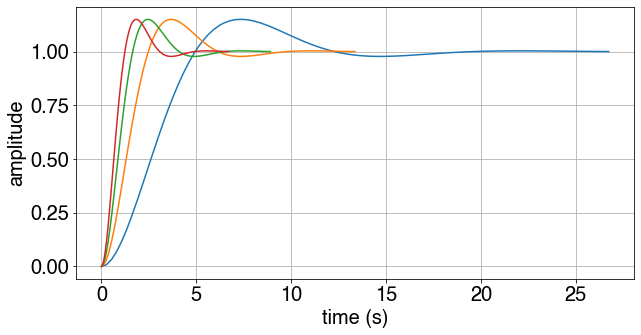

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
for w in np.arange(0.5, 2.1, 0.5):
    print('w', w)
    G = w**2/(s**2+2*xi*w*s+w**2)
    [tout, yout] = control.step_response(G)
    plt.plot(tout, yout)
    
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.grid()

- All responses have exactly $15\$ overshoot
- The rise time and settling time are influenced by the natural frequency

Let's see how the poles are impacted:

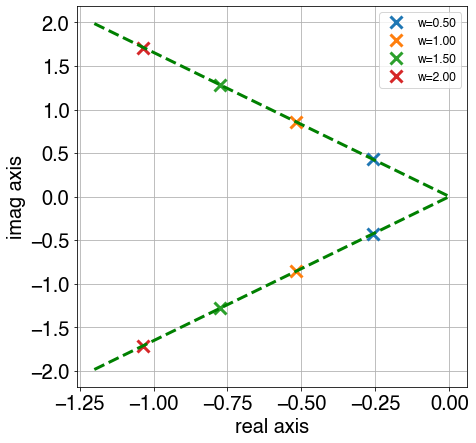

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

for w in np.arange(0.5, 2.1, 0.5):
    roots = np.roots([1,+2*xi*w,+w**2])
    plt.plot(np.real(roots), np.imag(roots), 
             linestyle='', marker='x', markeredgewidth=3, markersize=12, label='w={:.2f}'.format(w))

x_range = np.linspace(-1.2, 0)
plt.plot(x_range, -np.tan(phi)*x_range, linewidth=3, color='g', linestyle='--')
plt.plot(x_range, +np.tan(phi)*x_range, linewidth=3, color='g', linestyle='--')

plt.legend(fontsize=12)
plt.xlabel('real axis')
plt.ylabel('imag axis')
plt.grid()

### Requirements

- Time requirements
  - Raise time
  - Peak time
  - Settle time
  - Overshoot
  - Steady state error
  
- Frequency requirements
  - Bandwidth
  - Gain Margin
  - Phase Margin
  
- **S-Domain**
  - Pole/Zero locations
  
  
- Obviously they are all related 
- We have tools in the s-domain or in the frequency domain that we do not have in the time domain (e.g. root locus)

When focusing on S-Domain, the location of poles and zeros can be expressed:
 - rectangular coordinates: $x+yj$
 - polar coordinates: $\omega_n, \xi$

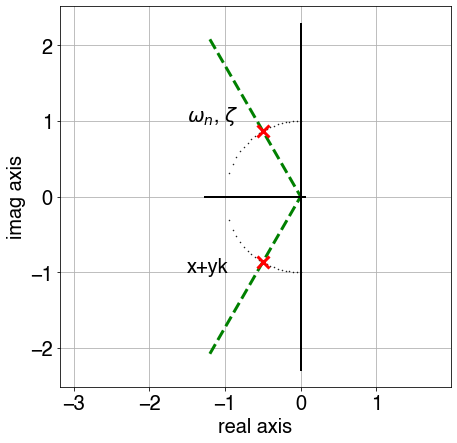

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

xi = 0.5
w  = 1
phi = np.arccos(xi)

our_roots = np.roots([1, 2*xi*w, w**2])

for xi in np.arange(0, 1, 0.05):
    r = np.roots([1, 2*xi*w, w**2])
    plt.plot(np.real(r), np.imag(r), 
         color='k', linestyle='', marker='.', markeredgewidth=1, markersize=1)

# constant damping ratio line
x_range = np.linspace(-1.2, 0)
plt.plot(x_range, -np.tan(phi)*x_range, linewidth=3, color='g', linestyle='--')
plt.plot(x_range, +np.tan(phi)*x_range, linewidth=3, color='g', linestyle='--')

# poles
plt.plot(np.real(our_roots), np.imag(our_roots), 
         color='r', linestyle='', marker='x', markeredgewidth=3, markersize=12)

# axis
plt.plot(plt.xlim(), [0, 0], linewidth=2, color='k')
plt.plot([0, 0], plt.ylim(), linewidth=2, color='k')

plt.text(-1.5, -1, 'x+yj')
plt.text(-1.5, 1, '$\omega_n$, $\zeta$')
plt.xlabel('real axis')
plt.ylabel('imag axis')
plt.axis('equal')
plt.grid()

- Damping ratio and natural frequency are only defined for 2nd order system
- They lose their meaning in higher order systems
- We saw that many higher order systems exibit 2nd order behaviours (e.g. dominant poles)
- When we have a requirement expressed in terms of damping ratio or natural frequency we are assuming that the system is 2nd order
- Play around with high order systems and verify what happens!

## Solving for gain in a root locus plot



<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/root-locus-problem.png" alt="root-locus-problem.png" style="width: 650px;"/> </td>
</tr>
</table>

Let's consier an arbitrary $G(s)$:

$$
G(s) = \frac{5}{(s+4)(s+2)}
$$

- Determine what value of $K$ gives a 15% overshoot

Let's start plotting the root locus

In [ ]:
s = control.tf([1, 0],[1])

(-5.5, 5.5)

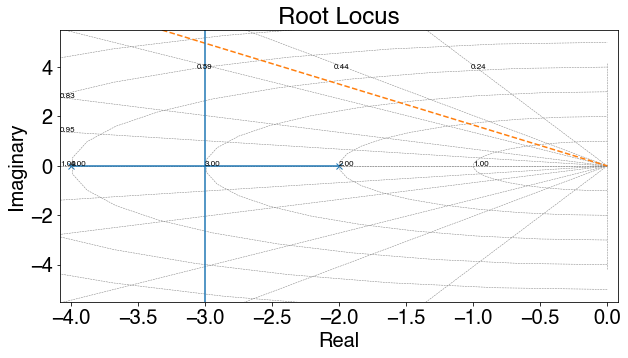

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(10, 5))
control.rlocus(5/((s+4)*(s+2)));

# desired damping ratio line
x_range = np.linspace(-4, 0)
plt.plot(x_range, -np.tan(1.0276)*x_range, linestyle='--')
plt.ylim(-5.5, 5.5)

- We saw that a 15% overshoot translates into:
   - $\zeta=0.5169$
   - $\theta=\cos^{-1}(0.5169) = 1.0276$ rad
   
- We would like to have our poles where the root locus intersects the line of damping ratio desired (see orange line in the plot above)

We can calculate the desired position for the poles:

- real component: $-3$
- imaginary component: $3\tan(\theta)=4.9683$ 

- Desired poles: $-3 \pm 4.9683 j$

The closed loop transfer function is:

$$
\frac{KG(s)}{1+KG(s)}
$$

We can then find:

$$
K = \frac{-1}{|G(s)|}\Big|_{s=-3 + 4.9683 j} = \frac{-1}{\frac{5}{(-3+4.97j+4)(-3+4.97j+2)}} = -\frac{(1+4.97j)(-1+4.97j)}{5}=\frac{1+4.97^2}{5}= 5.14
$$

**Steps:**
- Draw the loop locus
- Figure out where you would like the poles to be
- Plug the desired poles in the close loop characteristic equation and solve for $K$

- For more complex cases it could become more complicated.

## Some final comments on the Root Locus Development

Recall that the closed-loop characteristic equation is: 
$$
1 + KG(s) = 0
$$

where $G_{cl}(s) = G(s)R(s)$ is the open-loop transfer function. 

- How can we tell if an arbitrary point s = σ + jω lies on the root locus? 
- We seek conditions that determine whether s is a root of the characteristic equation. 

- $s$ is a root if $KG(s) = −1 + j0.$

or in polar form:

$$
KG(s) = |KG(s)| e^{j\angle(KG(s))} = -1+j0=1\cdot e^{j(2n+1)\pi} \;\; \text{for}\;\;  n=0,1,2,..
$$

This tells us that for any point s = σ + jω on the root locus:

$$
|KG(s)| = 1 
$$

and 

$$
\angle (G(s)) = (2n + 1)\pi
$$

This gives two important conditions:

- **The angle condition:** $\angle (G(s)) = (2n + 1)\pi$

- **The magnitude condition:** $|KG(s)|=1$

- The angle condition is used to determine whether a point $s$ lies on the root locus
- If a point lies on the root locus, the magnitude condition is used to determine the gain $K$ associated with that point, since $K = 1/ |G(s)|$.